In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
import os


train_directory = "D:/Prayag Files/TIET/Extras/hackathons/analog/Research Papers/Mine/Training"

class_names = ['no_tumor', 'pituitary_tumor']


classes = {class_name: index for index, class_name in enumerate(class_names)}

print(f"Class labels: {classes}")


for class_name in class_names:
    class_dir = os.path.join(train_directory, class_name)
    

    if os.path.exists(class_dir):
        files = os.listdir(class_dir)
        
     
        print(f"\nClass '{class_name}' has {len(files)} images. Sample files:")
        print(files[:5]) 
    else:
        print(f"Warning: '{class_name}' folder does not exist.")


Class labels: {'no_tumor': 0, 'pituitary_tumor': 1}

Class 'no_tumor' has 395 images. Sample files:
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']

Class 'pituitary_tumor' has 827 images. Sample files:
['p (1).jpg', 'p (10).jpg', 'p (100).jpg', 'p (101).jpg', 'p (102).jpg']


In [12]:
import os
import cv2


X = []
Y = []


for cls in classes:
   
    pth = os.path.join("D:/Prayag Files/TIET/Extras/hackathons/analog/Research Papers/Mine/Training", cls)
    
 
    for j in os.listdir(pth):
        img_path = os.path.join(pth, j)
        
       
        img = cv2.imread(img_path, 0)
        
        if img is not None:  
       
            img = cv2.resize(img, (200, 200))
            
          
            X.append(img)
            Y.append(classes[cls])
        else:
            print(f"Warning: Unable to load image {img_path}")


print(f"Total images loaded: {len(X)}")


Total images loaded: 1222


In [13]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [14]:
np.unique(Y)

array([0, 1])

In [15]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [16]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

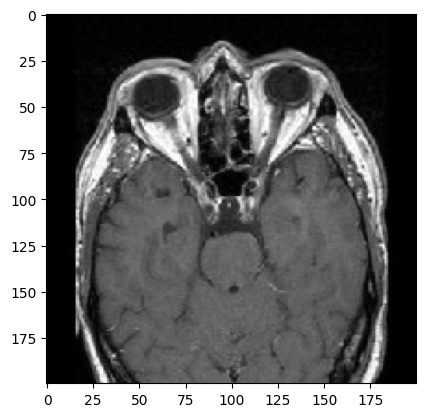

In [17]:
plt.imshow(X[0], cmap='gray')

In [18]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [20]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [21]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [22]:
from sklearn.decomposition import PCA

In [23]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [25]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [26]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [27]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [28]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [29]:
pred = sv.predict(xtest)

In [30]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [31]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  9
0 1


In [32]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

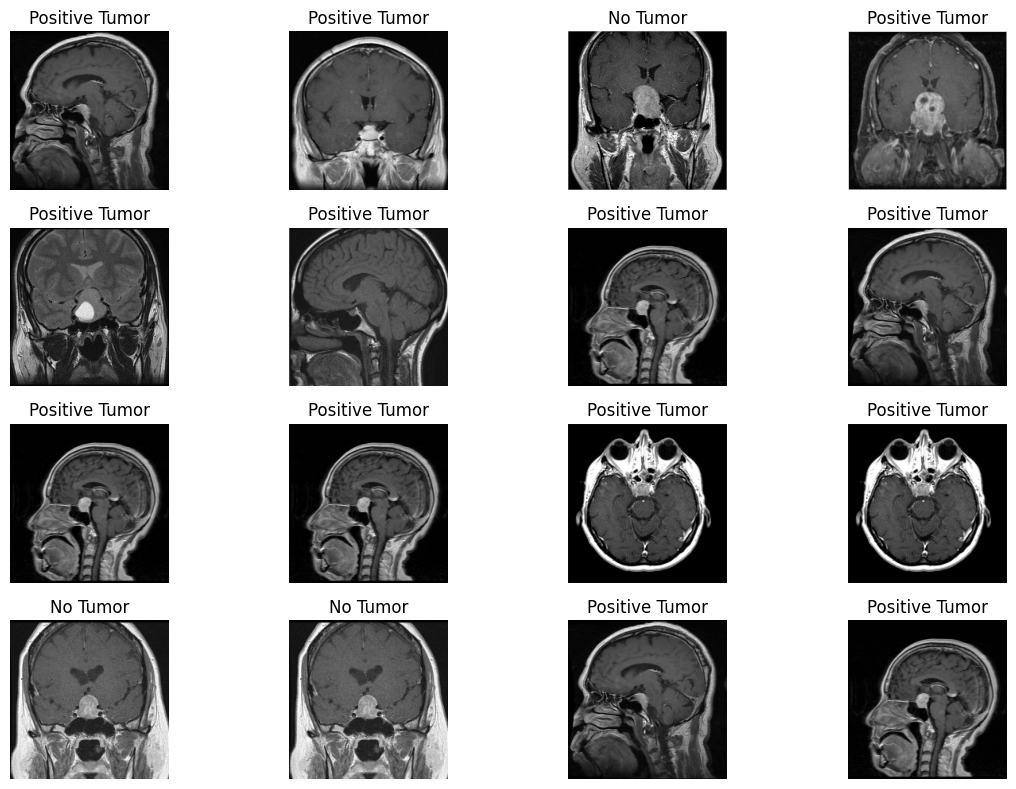

In [40]:
import os
import cv2
import matplotlib.pyplot as plt


test_directory = "D:/Prayag Files/TIET/Extras/hackathons/analog/Research Papers/Mine/Testing/pituitary_tumor"

plt.figure(figsize=(12, 8))
c = 1

for img_name in os.listdir(test_directory)[:16]:
    img_path = os.path.join(test_directory, img_name)
    
   
    img = cv2.imread(img_path, 0)
    
    if img is not None:
    
        img1 = cv2.resize(img, (200, 200))
        
        img1 = img1.reshape(1, -1) / 255.0
        
       
        p = sv.predict(img1)
        
      
        plt.subplot(4, 4, c)
        plt.title(dec[p[0]])
 
        plt.imshow(img1.reshape(200, 200), cmap='gray')
        plt.axis('off')
        c += 1


plt.tight_layout()
plt.show()


Checking training path: D:\Prayag Files\TIET\Extras\hackathons\analog\Research Papers\Mine\Training\no_tumor
Checking training path: D:\Prayag Files\TIET\Extras\hackathons\analog\Research Papers\Mine\Training\pituitary_tumor
Number of training samples: 1222
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 13s 325ms/step - accuracy: 0.6821 - loss: 1.0948 - val_accuracy: 0.9102 - val_loss: 0.2521
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - accuracy: 0.9227 - loss: 0.2108 - val_accuracy: 0.9592 - val_loss: 0.1113
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.9722 - loss: 0.0847 - val_accuracy: 0.9837 - val_loss: 0.0521
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.9876 - loss: 0.0417 - val_accuracy: 0.9796 - val_loss: 0.0623
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.9992 - loss: 0.0150 - val_accuracy: 0.9837 - val_loss: 0.0421
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accuracy: 0.9973 - loss: 0.0160 - val_accu

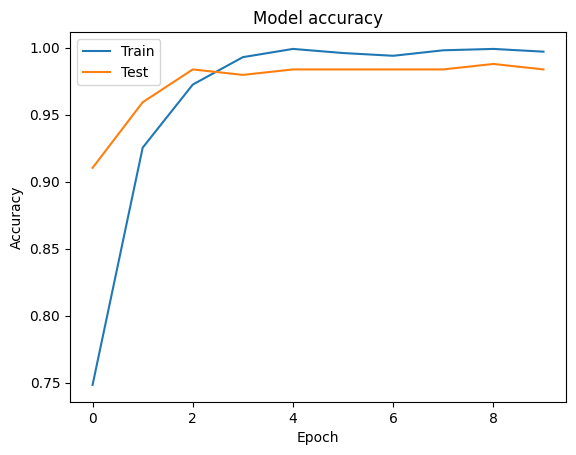

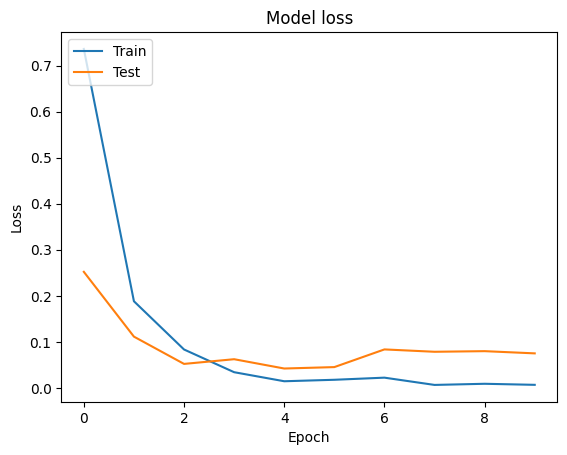

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


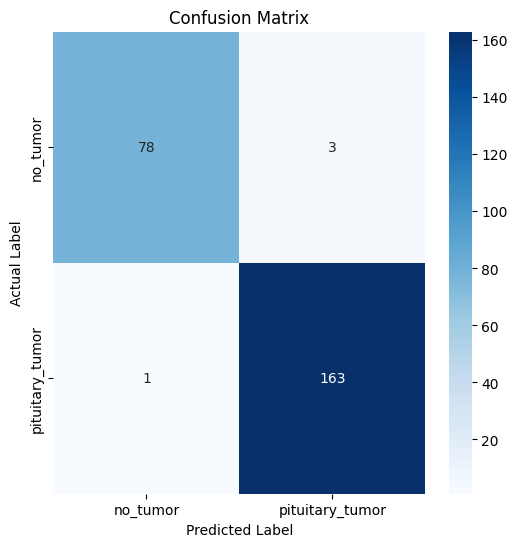

Test Accuracy: 0.9836734693877551


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical


base_path = 'D:\\Prayag Files\\TIET\\Extras\\hackathons\\analog\\Research Papers\\Mine\\'
training_path = os.path.join(base_path, 'Training')  # Path to training data
testing_path = os.path.join(base_path, 'Testing')  # Path to testing data
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

X = []
Y = []


for cls in classes:
    train_cls_path = os.path.join(training_path, cls)
    print(f"Checking training path: {train_cls_path}")  
    if not os.path.exists(train_cls_path):
        print(f"Training path does not exist: {train_cls_path}")
        continue  
    
    for j in os.listdir(train_cls_path):
        img_path = os.path.join(train_cls_path, j)
        if os.path.isfile(img_path):  
            img = cv2.imread(img_path, 0)
            img = cv2.resize(img, (200, 200))
            X.append(img)
            Y.append(classes[cls])

print(f"Number of training samples: {len(X)}") 


X = np.array(X)
Y = np.array(Y)


if len(X) == 0:
    print("No training samples found. Please check your directories.")
else:
   
    X = X.reshape(len(X), 200, 200, 1)  
    X = X / 255.0  


    Y = to_categorical(Y, num_classes=2)

    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10, test_size=0.20)

   
    model = Sequential()


    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2, activation='softmax'))  # 2 output classes


    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

   
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10, batch_size=32)

   
    train_loss, train_acc = model.evaluate(xtrain, ytrain)
    test_loss, test_acc = model.evaluate(xtest, ytest)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    
    predictions = model.predict(xtest)

    
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(ytest, axis=1)

 
    from sklearn.metrics import confusion_matrix, accuracy_score
    import seaborn as sns

    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes.keys(), yticklabels=classes.keys())
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


    accuracy = accuracy_score(true_classes, predicted_classes)
    print(f"Test Accuracy: {accuracy}")


Checking training path: D:\Prayag Files\TIET\Extras\hackathons\analog\Research Papers\Mine\Training\no_tumor
Checking training path: D:\Prayag Files\TIET\Extras\hackathons\analog\Research Papers\Mine\Training\pituitary_tumor
Number of training samples: 1222
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 180s 6s/step - accuracy: 0.7012 - loss: 0.6558 - val_accuracy: 0.9306 - val_loss: 0.1885
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 190s 6s/step - accuracy: 0.9654 - loss: 0.1417 - val_accuracy: 0.9796 - val_loss: 0.0785
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 189s 6s/step - accuracy: 0.9803 - loss: 0.0759 - val_accuracy: 0.9878 - val_loss: 0.0575
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 197s 6s/step - accuracy: 0.9896 - loss: 0.0513 - val_accuracy: 0.9878 - val_loss: 0.0518
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 198s 6s/step - accuracy: 0.9913 - loss: 0.0362 - val_accuracy: 0.9878 - val_loss: 0.0508
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 323s 11s/step - accuracy: 0.9890 - loss: 0.0410 - val_accuracy: 0.995

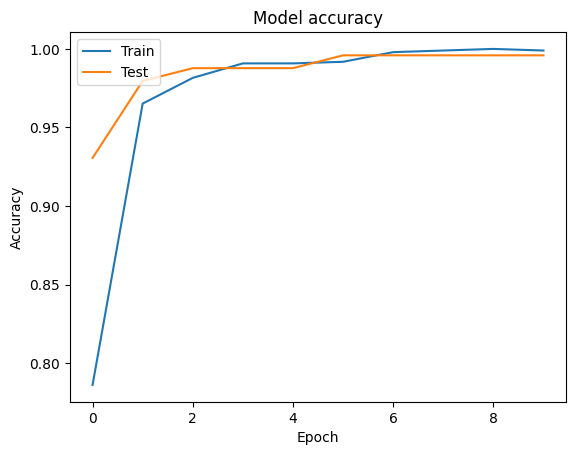

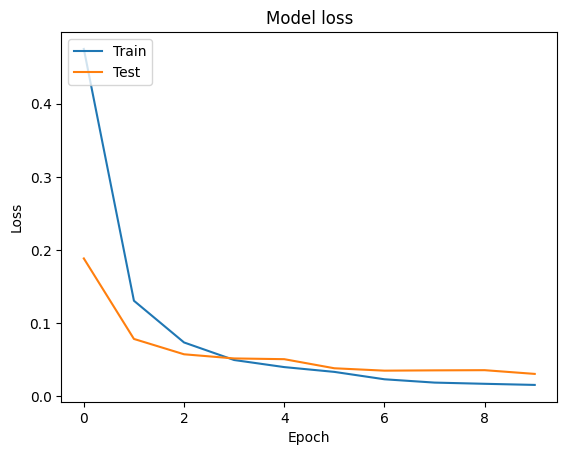

8/8 ━━━━━━━━━━━━━━━━━━━━ 94s 12s/step


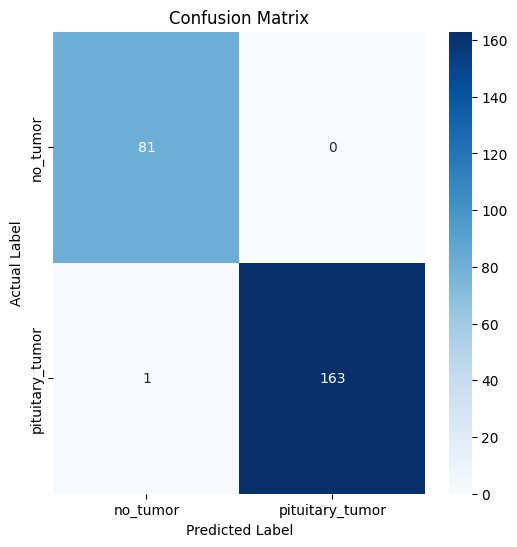

Test Accuracy: 0.9959183673469387


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

base_path = 'D:\\Prayag Files\\TIET\\Extras\\hackathons\\analog\\Research Papers\\Mine\\'
training_path = os.path.join(base_path, 'Training')  
testing_path = os.path.join(base_path, 'Testing')  
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

X = []
Y = []


for cls in classes:
    train_cls_path = os.path.join(training_path, cls)
    print(f"Checking training path: {train_cls_path}") 
    if not os.path.exists(train_cls_path):
        print(f"Training path does not exist: {train_cls_path}")
        continue  
    
    for j in os.listdir(train_cls_path):
        img_path = os.path.join(train_cls_path, j)
        if os.path.isfile(img_path):  
            img = cv2.imread(img_path, 0)
            img = cv2.resize(img, (224, 224))  
            X.append(img)
            Y.append(classes[cls])

print(f"Number of training samples: {len(X)}")  


X = np.array(X)
Y = np.array(Y)


if len(X) == 0:
    print("No training samples found. Please check your directories.")
else:
  
    X = np.stack([np.repeat(img[..., np.newaxis], 3, -1) for img in X])  
    X = X / 255.0  

    Y = to_categorical(Y, num_classes=2)


    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10, test_size=0.20)


    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in vgg16.layers:
        layer.trainable = False


    model = Sequential()
    model.add(vgg16) 
    model.add(Flatten())  
    model.add(Dense(128, activation='relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))  
  
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

 
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10, batch_size=32)

   
    train_loss, train_acc = model.evaluate(xtrain, ytrain)
    test_loss, test_acc = model.evaluate(xtest, ytest)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)


    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    predictions = model.predict(xtest)

  
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(ytest, axis=1)


    from sklearn.metrics import confusion_matrix, accuracy_score
    import seaborn as sns

    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes.keys(), yticklabels=classes.keys())
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


    accuracy = accuracy_score(true_classes, predicted_classes)
    print(f"Test Accuracy: {accuracy}")


Checking training path: D:\Prayag Files\TIET\Extras\hackathons\analog\Research Papers\Mine\Training\no_tumor
Checking training path: D:\Prayag Files\TIET\Extras\hackathons\analog\Research Papers\Mine\Training\pituitary_tumor
Number of training samples: 1222
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 509s 8s/step - accuracy: 0.8018 - loss: 0.7198 - val_accuracy: 0.9714 - val_loss: 0.0727
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.9900 - loss: 0.0367 - val_accuracy: 0.9755 - val_loss: 0.0793
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 7563s 252s/step - accuracy: 0.9899 - loss: 0.0393 - val_accuracy: 0.9918 - val_loss: 0.0467
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.9991 - loss: 0.0096 - val_accuracy: 0.9918 - val_loss: 0.0526
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - accuracy: 0.9976 - loss: 0.0124 - val_accuracy: 0.9878 - val_loss: 0.0474
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step - 

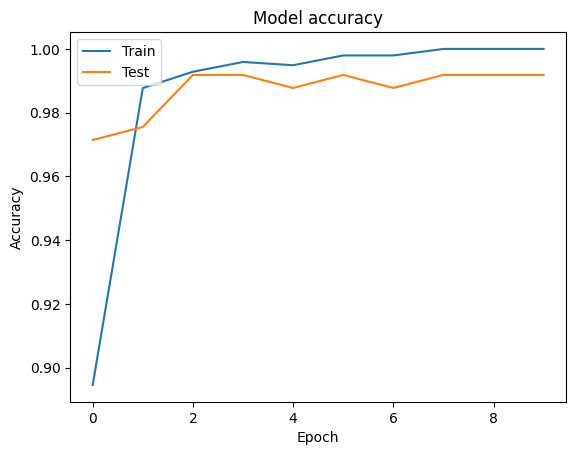

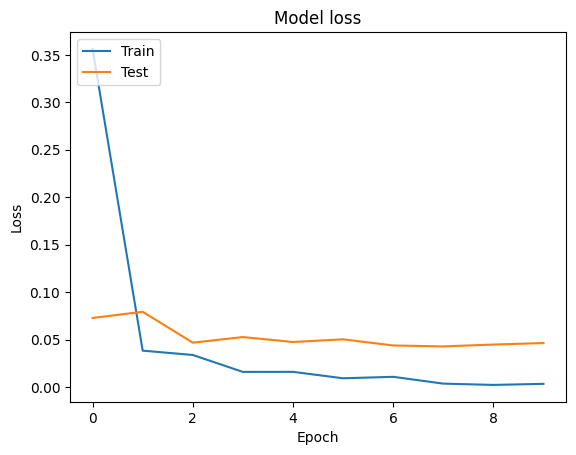

8/8 ━━━━━━━━━━━━━━━━━━━━ 131s 10s/step


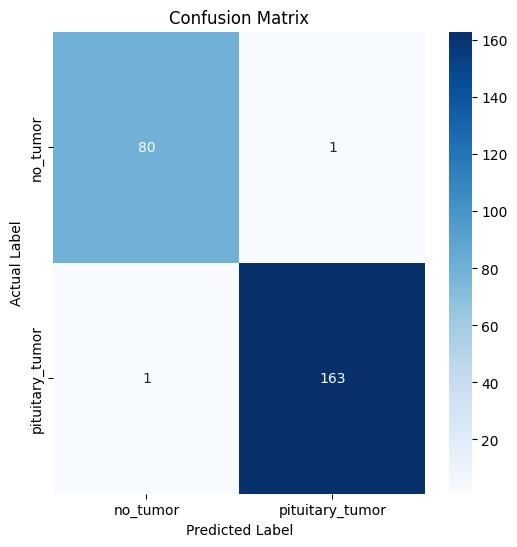

Test Accuracy: 0.9918367346938776


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.applications import DenseNet121
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam


base_path = 'D:\\Prayag Files\\TIET\\Extras\\hackathons\\analog\\Research Papers\\Mine\\'
training_path = os.path.join(base_path, 'Training')  
testing_path = os.path.join(base_path, 'Testing')  
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

X = []
Y = []


for cls in classes:
    train_cls_path = os.path.join(training_path, cls)
    print(f"Checking training path: {train_cls_path}") 
    if not os.path.exists(train_cls_path):
        print(f"Training path does not exist: {train_cls_path}")
        continue  
    
    for j in os.listdir(train_cls_path):
        img_path = os.path.join(train_cls_path, j)
        if os.path.isfile(img_path):  
            img = cv2.imread(img_path, 0)
            img = cv2.resize(img, (224, 224))  
            X.append(img)
            Y.append(classes[cls])

print(f"Number of training samples: {len(X)}")  


X = np.array(X)
Y = np.array(Y)


if len(X) == 0:
    print("No training samples found. Please check your directories.")
else:
   
    X = np.stack([np.repeat(img[..., np.newaxis], 3, -1) for img in X])  
    X = X / 255.0  

  
    Y = to_categorical(Y, num_classes=2)

  
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10, test_size=0.20)

    
    densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  
    for layer in densenet.layers:
        layer.trainable = False


    model = Sequential()
    model.add(densenet)  
    model.add(Flatten()) 
    model.add(Dense(128, activation='relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))  

   
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

 
    history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10, batch_size=32)

   
    train_loss, train_acc = model.evaluate(xtrain, ytrain)
    test_loss, test_acc = model.evaluate(xtest, ytest)

    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)


    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

   
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

   
    predictions = model.predict(xtest)

 
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(ytest, axis=1)


    from sklearn.metrics import confusion_matrix, accuracy_score
    import seaborn as sns

    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes.keys(), yticklabels=classes.keys())
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


    accuracy = accuracy_score(true_classes, predicted_classes)
    print(f"Test Accuracy: {accuracy}")


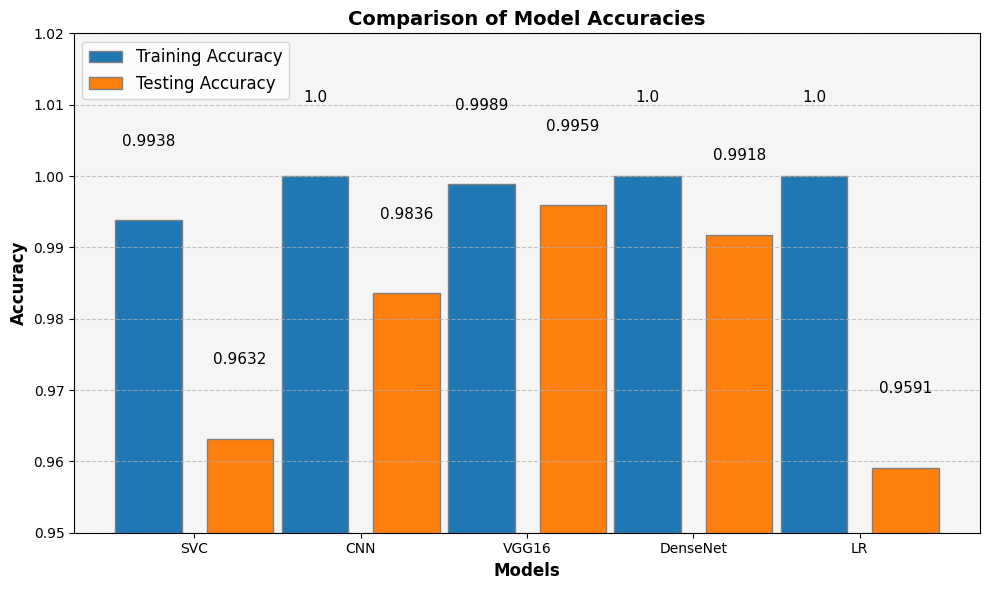

In [54]:
import matplotlib.pyplot as plt
import numpy as np


models = ['SVC', 'CNN', 'VGG16', 'DenseNet','LR']
training_scores = [0.9938, 1.0, 0.9989, 1.0, 1.0]
testing_scores = [0.9632, 0.9836, 0.9959, 0.9918, 0.9591]


bar_width = 0.4
spacing = 0.15


r1 = np.arange(len(models))
r2 = [x + bar_width + spacing for x in r1]


plt.figure(figsize=(10, 6))


bars1 = plt.bar(r1, training_scores, color='#1f77b4', width=bar_width, edgecolor='grey', label='Training Accuracy')
bars2 = plt.bar(r2, testing_scores, color='#ff7f0e', width=bar_width, edgecolor='grey', label='Testing Accuracy')


plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
plt.title('Comparison of Model Accuracies', fontweight='bold', fontsize=14)


plt.xticks([r + bar_width/2 + spacing/2 for r in range(len(models))], models)


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.legend(loc='upper left', fontsize=12)


for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=11)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=11)


plt.ylim(0.95, 1.02)

plt.gca().set_facecolor('#f5f5f5')


plt.tight_layout()


plt.show()